# BRD4
[Cornelia de Lange syndrome-6 (CDLS6)](https://omim.org/entry/620568) is caused by heterozygous mutation in the BRD4 gene. At the time of this writing, we did not identify publications about genotype-phenotype correlations in BRD4.

[Jouret G, et al. Understanding the new BRD4-related syndrome: Clinical and genomic delineation with an international cohort study. Clin Genet. 2022](https://pubmed.ncbi.nlm.nih.gov/35470444/) stated:

>  No correlation was identified between severity of neurodevelopment delay and type of variant (large deletion, null variant, missense variant)

The authors concluded that more data would be needed to test for the presence of genotype-phenotype correlations in this gene. At the time of this writing (Nov. 8, 2024), no additional relevant datasets have been publöished.

In [1]:
import gpsea
import hpotk

store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo()
print(f'Loaded HPO v{hpo.version}')
print(f"Using gpsea version {gpsea.__version__}")

Loaded HPO v2024-12-12
Using gpsea version 0.9.1


## BRD4
We user the [Matched Annotation from NCBI and EMBL-EBI (MANE)](https://www.ncbi.nlm.nih.gov/refseq/MANE/) transcript and the corresponding protein identifier for BRD4.

In [2]:
gene_symbol = 'BRD4'
mane_tx_id = 'NM_001379291.1'
mane_protein_id = 'NP_001366220.1' # bromodomain containing 4 (BRD4), transcript variant 4

In [3]:
from ppktstore.registry import configure_phenopacket_registry

phenopacket_store_release = '0.1.23'
registry = configure_phenopacket_registry()

with registry.open_phenopacket_store(release=phenopacket_store_release) as ps:
    cdls6_phenopackets = tuple(ps.iter_cohort_phenopackets(gene_symbol))

print(f'Loaded {len(cdls6_phenopackets)} phenopackets ({gene_symbol}).')

from gpsea.preprocessing import configure_caching_cohort_creator, load_phenopackets

cohort_creator = configure_caching_cohort_creator(hpo)

cohort, qc = load_phenopackets(
    phenopackets=cdls6_phenopackets, 
    cohort_creator=cohort_creator,
)
print(f'Loaded {len(cohort)} individuals')
qc.summarize()

Loaded 18 phenopackets (BRD4).
Individuals Processed: 100%|██████████| 18/18 [00:25<00:00,  1.41s/individuals]
Loaded 18 individuals
Validated under permissive policy
Showing errors and warnings
Phenopackets
  patient #3
    individual
     warnings:
     ·`time_element` is in currently unsupported format `ontology_class`
  patient #10
    individual
     warnings:
     ·`time_element` is in currently unsupported format `ontology_class`


In [4]:
from gpsea.view import CohortViewer

cv = CohortViewer(hpo)
cv.process(cohort, transcript_id=mane_tx_id)

n,HPO Term
15,Microcephaly
15,Global developmental delay
10,Short nose
10,Highly arched eyebrow
8,Synophrys
7,Intellectual disability
7,Sparse eyebrow
6,Anteverted nares
5,Intrauterine growth retardation
4,Macrotia


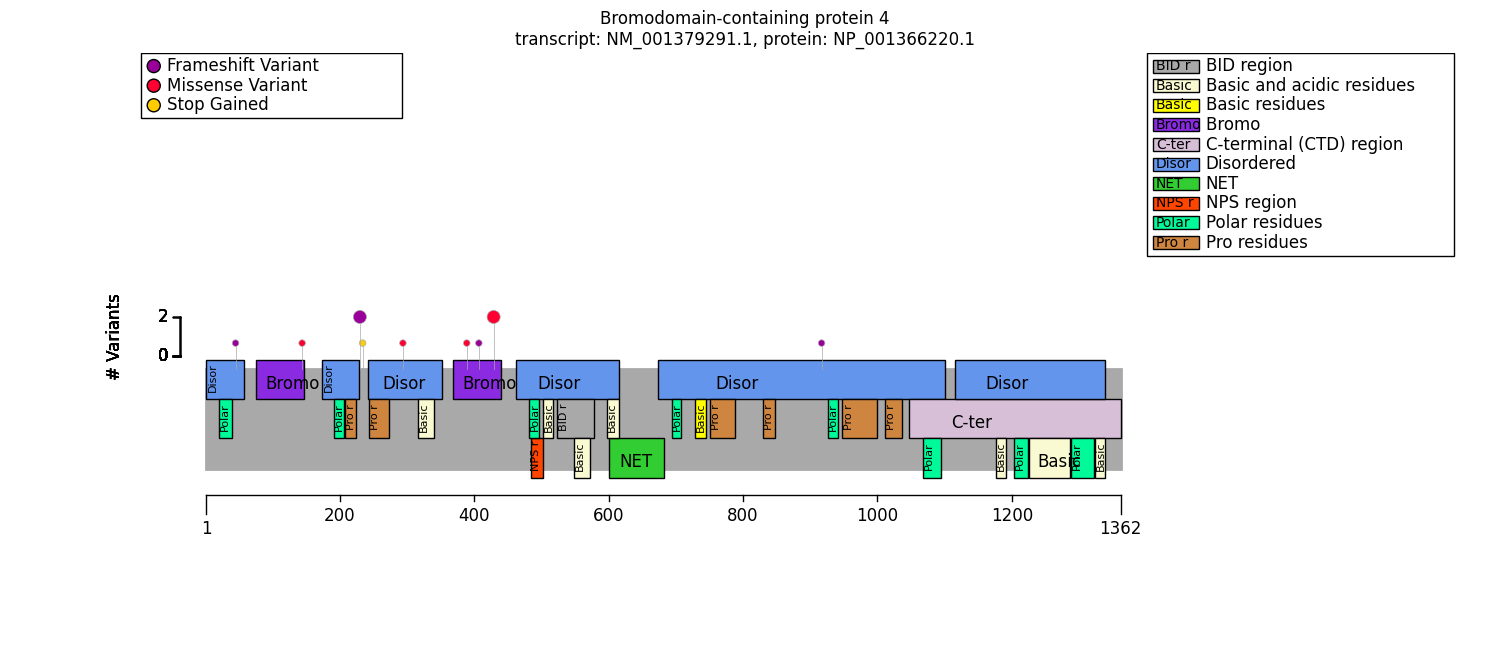

In [6]:
from gpsea.model.genome import GRCh38
from gpsea.preprocessing import configure_default_protein_metadata_service, VVMultiCoordinateService
from gpsea.view import ProteinVisualizer
import matplotlib.pyplot as plt

txc_service = VVMultiCoordinateService(genome_build=GRCh38)
pms = configure_default_protein_metadata_service()
tx_coordinates = txc_service.fetch(mane_tx_id)
protein_meta = pms.annotate(mane_protein_id)

brd4_fig, ax = plt.subplots(figsize=(15, 8))
visualizer = ProteinVisualizer()
visualizer.draw_protein_diagram(
    tx_coordinates,
    protein_meta,
    cohort,
    ax=ax,
)
brd4_fig.tight_layout()

# Genotype Phenotype Correlation (GPC) Analysis

We are aware of no published GPC related to variants in the BRD4 gene. We will test a correlation between the most common variant type (transcript ablation).

In [7]:
from gpsea.analysis.pcats import configure_hpo_term_analysis
from gpsea.analysis.clf import prepare_classifiers_for_terms_of_interest

analysis = configure_hpo_term_analysis(hpo)

pheno_clfs = prepare_classifiers_for_terms_of_interest(
    cohort=cohort,
    hpo=hpo,
)

In [8]:
from gpsea.model import VariantEffect
from gpsea.analysis.clf import monoallelic_classifier
from gpsea.analysis.predicate import variant_effect
from gpsea.view import MtcStatsViewer

ablation = variant_effect(effect=VariantEffect.TRANSCRIPT_ABLATION, tx_id=mane_tx_id)
ablation_clf = monoallelic_classifier(
    a_predicate=ablation,
    b_predicate=~ablation,
    a_label="ablation",
    b_label="other"
)
ablation_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=ablation_clf,
    pheno_clfs=pheno_clfs,
)

viewer = MtcStatsViewer()
viewer.process(ablation_result)

Code,Reason,Count
HMF01,Skipping term with maximum frequency that was less than threshold 0.4,5
HMF03,Skipping term because of a child term with the same individual counts,11
HMF08,Skipping general term,47
HMF09,Skipping term with maximum annotation frequency that was less than threshold 0.4,122


In [9]:
from gpsea.view import summarize_hpo_analysis

summarize_hpo_analysis(hpo=hpo, result=ablation_result)

Allele group                                       ablation          other  \
                                                      Count Percent  Count   
Macrotia [HP:0000400]                                   4/5     80%    0/4   
Microcephaly [HP:0000252]                               7/7    100%   8/11   
Intrauterine growth retardation [HP:0001511]            3/5     60%    2/9   
Short nose [HP:0003196]                                 5/5    100%    5/7   
Highly arched eyebrow [HP:0002553]                      5/5    100%    5/7   
Decreased head circumference [HP:0040195]               7/7    100%    8/8   
Abnormal axial skeleton morphology [HP:0009121]         7/7    100%  10/10   
Aplasia/Hypoplasia of the cerebrum [HP:0007364]         7/7    100%    8/8   
Morphological central nervous system abnormalit...      7/7    100%    8/8   
Abnormal cerebral morphology [HP:0002060]               7/7    100%    8/8   
Global developmental delay [HP:0001263]                 4/4    100%  11/11   
Neurodevelopmental delay [HP:0012758]                   5/5    100%  11/11   
Neurodevelopmental abnormality [HP:0012759]             5/5    100%  11/11   
Intellectual disability [HP:0001249]                    3/3    100%    4/5   
Synophrys [HP:0000664]                                  3/5     60%    5/8   
Facial hypertrichosis [HP:0002219]                      3/3    100%    5/5   
Abnormal eyebrow morphology [HP:0000534]                5/5    100%    7/7   
Abnormal ocular adnexa morphology [HP:0030669]          5/5    100%    8/8   
Abnormal nasal morphology [HP:0005105]                  5/5    100%    6/6   
Abnormal oral cavity morphology [HP:0000163]            2/2    100%    6/6   
Sparse eyebrow [HP:0045075]                             4/4    100%    3/4   
Downslanted palpebral fissures [HP:0000494]             1/4     25%    2/5   

Allele group                                                                   \
                                                   Percent Corrected p values   
Macrotia [HP:0000400]                                   0%                1.0   
Microcephaly [HP:0000252]                              73%                1.0   
Intrauterine growth retardation [HP:0001511]           22%                1.0   
Short nose [HP:0003196]                                71%                1.0   
Highly arched eyebrow [HP:0002553]                     71%                1.0   
Decreased head circumference [HP:0040195]             100%                1.0   
Abnormal axial skeleton morphology [HP:0009121]       100%                1.0   
Aplasia/Hypoplasia of the cerebrum [HP:0007364]       100%                1.0   
Morphological central nervous system abnormalit...    100%                1.0   
Abnormal cerebral morphology [HP:0002060]             100%                1.0   
Global developmental delay [HP:0001263]               100%                1.0   
Neurodevelopmental delay [HP:0012758]                 100%                1.0   
Neurodevelopmental abnormality [HP:0012759]           100%                1.0   
Intellectual disability [HP:0001249]                   80%                1.0   
Synophrys [HP:0000664]                                 62%                1.0   
Facial hypertrichosis [HP:0002219]                    100%                1.0   
Abnormal eyebrow morphology [HP:0000534]              100%                1.0   
Abnormal ocular adnexa morphology [HP:0030669]        100%                1.0   
Abnormal nasal morphology [HP:0005105]                100%                1.0   
Abnormal oral cavity morphology [HP:0000163]          100%                1.0   
Sparse eyebrow [HP:0045075]                            75%                1.0   
Downslanted palpebral fissures [HP:0000494]            40%                1.0   

Allele group                                                  
                                                    p values  
Macrotia [HP:0000400]                               0.04

# Compare CDLS6 with CDLS1
The above analysis failed to identify a signfiicant genotype-phenotype correlation within the CDLS6 cohort. In the following,
we address the hypothesis that the distribution of phenotypic features is significantly different between CDLS6 and CDLS1.

In [10]:
from gpsea.preprocessing import configure_caching_cohort_creator

NIPBL_symbol = "NIPBL"
with registry.open_phenopacket_store(release=phenopacket_store_release) as ps:
    nipbl_phenopackets = tuple(ps.iter_cohort_phenopackets(NIPBL_symbol))

print(f'Loaded {len(nipbl_phenopackets)} phenopackets ({NIPBL_symbol}).')
cdls_phenopackets = list()
cdls_phenopackets.extend(cdls6_phenopackets)
cdls_phenopackets.extend(nipbl_phenopackets)
print(f"Combining {len(nipbl_phenopackets)} NIPBL phenopackets and {len(cdls6_phenopackets)} BRD4 phenopackets")
print(f"Got total of {len(cdls_phenopackets)} phenopackets")
cohort_creator = configure_caching_cohort_creator(hpo)
combined_cohort, qc_results = load_phenopackets(cdls_phenopackets, cohort_creator)  


Loaded 60 phenopackets (NIPBL).
Combining 60 NIPBL phenopackets and 18 BRD4 phenopackets
Got total of 78 phenopackets
Individuals Processed: 100%|██████████| 78/78 [01:38<00:00,  1.26s/individuals]


In [11]:
from gpsea.analysis.predicate import gene

nipbl = gene(symbol="NIPBL")
brd4 = gene(symbol="BRD4")
dx_clf = monoallelic_classifier(
    a_predicate=nipbl,
    b_predicate= brd4,
    a_label='NIPBL',
    b_label= 'BRD4'
)
dx_result = analysis.compare_genotype_vs_phenotypes(
    cohort=combined_cohort,
    gt_clf=dx_clf,
    pheno_clfs=pheno_clfs,
)
summarize_hpo_analysis(hpo, dx_result)

Allele group                                        NIPBL           BRD4  \
                                                    Count Percent  Count   
Intrauterine growth retardation [HP:0001511]        37/45     82%    2/9   
Synophrys [HP:0000664]                              40/41     98%    5/8   
Highly arched eyebrow [HP:0002553]                  31/31    100%    5/7   
Long philtrum [HP:0000343]                          30/38     79%    2/6   
Clinodactyly of the 5th finger [HP:0004209]         18/41     44%    2/2   
Global developmental delay [HP:0001263]             34/38     89%  11/11   
Microcephaly [HP:0000252]                           31/38     82%   8/11   
Decreased head circumference [HP:0040195]           31/31    100%    8/8   
Abnormal axial skeleton morphology [HP:0009121]     46/46    100%  10/10   
Aplasia/Hypoplasia of the cerebrum [HP:0007364]     31/31    100%    8/8   
Aplasia/Hypoplasia involving the central nervou...  32/32    100%    8/8   
Morphological central nervous system abnormalit...  32/32    100%    8/8   
Abnormal cerebral morphology [HP:0002060]           32/32    100%    8/8   
Growth delay [HP:0001510]                           49/49    100%    2/2   
Neurodevelopmental delay [HP:0012758]               38/38    100%  11/11   
Neurodevelopmental abnormality [HP:0012759]         42/42    100%  11/11   
Intellectual disability [HP:0001249]                29/35     83%    4/5   
Facial hypertrichosis [HP:0002219]                  40/40    100%    5/5   
Abnormal hair quantity [HP:0011362]                 47/47    100%    5/5   
Abnormal eyebrow morphology [HP:0000534]            41/41    100%    7/7   
Abnormal ocular adnexa morphology [HP:0030669]      41/41    100%    8/8   
Abnormal nasal morphology [HP:0005105]              36/36    100%    6/6   
Abnormality of the philtrum [HP:0000288]            30/30    100%    2/2   
Abnormal upper lip morphology [HP:0000177]          35/35    100%    2/2   
Abnormal lip morphology [HP:0000159]                35/35    100%    3/3   
Abnormal oral cavity morphology [HP:0000163]        43/43    100%    6/6   
Anteverted nares [HP:0000463]                       25/33     76%    3/4   
Gastroesophageal reflux [HP:0002020]                20/34     59%    1/1   
Abnormal appendicular skeleton morphology [HP:0...  40/40    100%    5/5   
Abnormal digit morphology [HP:0011297]              36/36    100%    3/3   
Abnormal hand morphology [HP:0005922]               34/34    100%    3/3   
Abnormal eyelid morphology [HP:0000492]             37/37    100%    2/2   
Aplasia/hypoplasia involving the skeleton [HP:0...  35/35    100%    1/1   

Allele group                                                                   \
                                                   Percent Corrected p values   
Intrauterine growth retardation [HP:0001511]           22%           0.031178   
Synophrys [HP:0000664]                                 62%           0.184254   
Highly arched eyebrow [HP:0002553]                     71%           0.317642   
Long philtrum [HP:0000343]                             33%           0.317642   
Clinodactyly of the 5th finger [HP:0004209]           100%           1.000000   
Global developmental delay [HP:0001263]               100%           1.000000   
Microcephaly [HP:0000252]                              73%           1.000000   
Decreased head circumference [HP:0040195]             100%           1.000000   
Abnormal axial skeleton morphology [HP:0009121]       100%           1.000000   
Aplasia/Hypoplasia of the cerebrum [HP:0007364]       100%           1.000000   
Aplasia/Hypoplasia involving the central nervou...    100%           1.000000   
Morphological central nervous system abnormalit...    100%           1.000000   
Abnormal cerebral morphology [HP:0002060]             100%           1.000000   
Growth delay [HP:0001510]                             100%           1.000000   
Neurodevelopmental delay [HP:0012758]      

# Summary

In [12]:
from gpseacs.report import  GPAnalysisResultSummary, GpseaAnalysisReport

f_results =  (
 GPAnalysisResultSummary.from_multi(
        result=ablation_result,
    ), GPAnalysisResultSummary.from_multi(
        result=dx_result,
    ),
)

report = GpseaAnalysisReport(
    name=gene_symbol,
    cohort=cohort,
    fet_results=f_results,
    gene_symbol=gene_symbol,
    mane_tx_id=mane_tx_id,
    mane_protein_id=mane_protein_id,
)

In [13]:
from gpseacs.report import GpseaNotebookSummarizer
summarizer = GpseaNotebookSummarizer(hpo=hpo, gpsea_version=gpsea.__version__)
summarizer.summarize_report(report=report)

In [17]:
summarizer.process_latex(report=report, protein_fig=brd4_fig)

Figure saved to ../../supplement/img/BRD4_protein_diagram-draft.pdf
Output to ../../supplement/tex/BRD4_summary_draft.tex
